# Data Science Project - Churn Prediction

### Prasetyo Wisnu N

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
with open("Churn Dataset.csv","rb") as file:
    df=pd.read_csv(file)

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [45]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Dropping Surname and ID Feature

In [47]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)

In [48]:
df[df.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [49]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

### Churn Count

<AxesSubplot: xlabel='IsActiveMember', ylabel='count'>

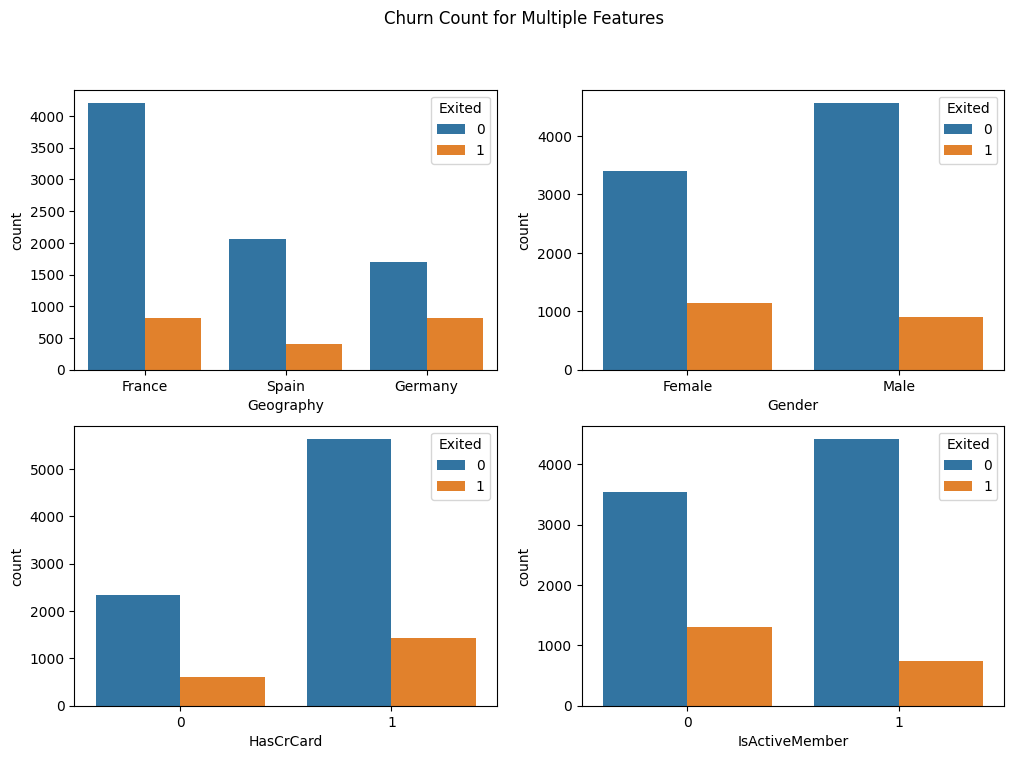

In [50]:
fig,ax=plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Churn Count for Multiple Features')
sns.countplot(x='Geography',hue='Exited',data=df,ax=ax[0,0])
sns.countplot(x='Gender',hue='Exited',data=df,ax=ax[0,1])
sns.countplot(x='HasCrCard',hue='Exited',data=df,ax=ax[1,0])
sns.countplot(x='IsActiveMember',hue='Exited',data=df,ax=ax[1,1])

### Checking Outlier

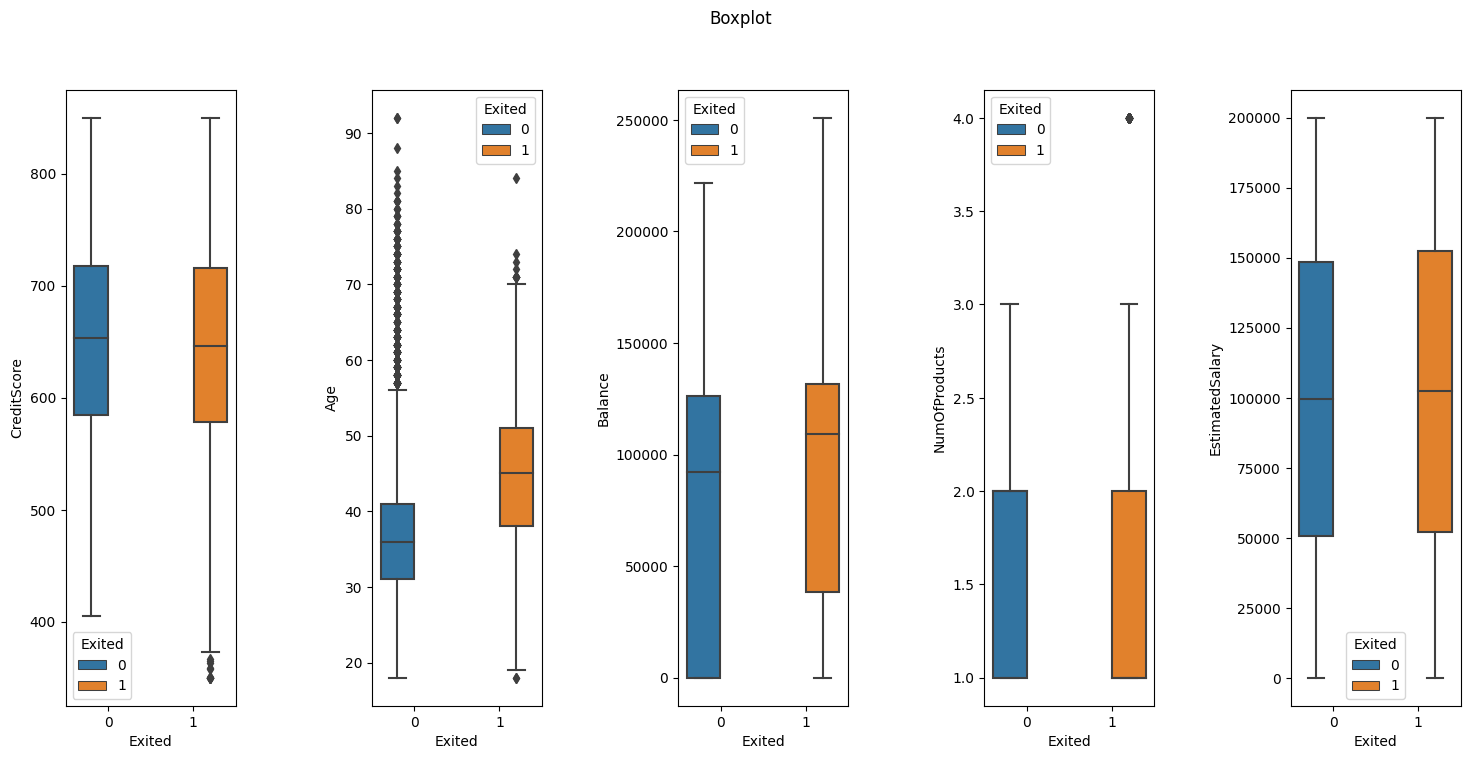

In [51]:
yname=['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']
numname=range(0,5)
fig,ax=plt.subplots(1,5,figsize=(18,8))
plt.subplots_adjust(wspace=0.8)
plt.suptitle('Boxplot')

for yout,numout in zip(yname,numname):
    sns.boxplot(y=yout,x='Exited',hue='Exited',data=df,ax=ax[numout])



### Count for Label

<AxesSubplot: xlabel='Exited', ylabel='count'>

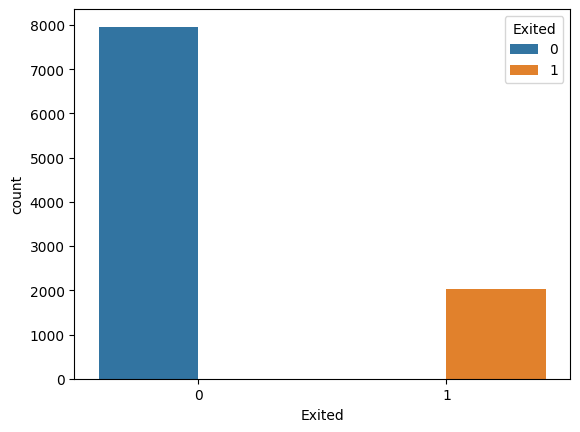

In [52]:
sns.countplot(x='Exited',hue='Exited',data=df)

In [53]:
df['Exited'].value_counts()*100/len(df['Exited'])

0    79.63
1    20.37
Name: Exited, dtype: float64

### Correlation Value

C:\Users\prase\AppData\Local\Temp\ipykernel_24404\1351173284.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)


<AxesSubplot: >

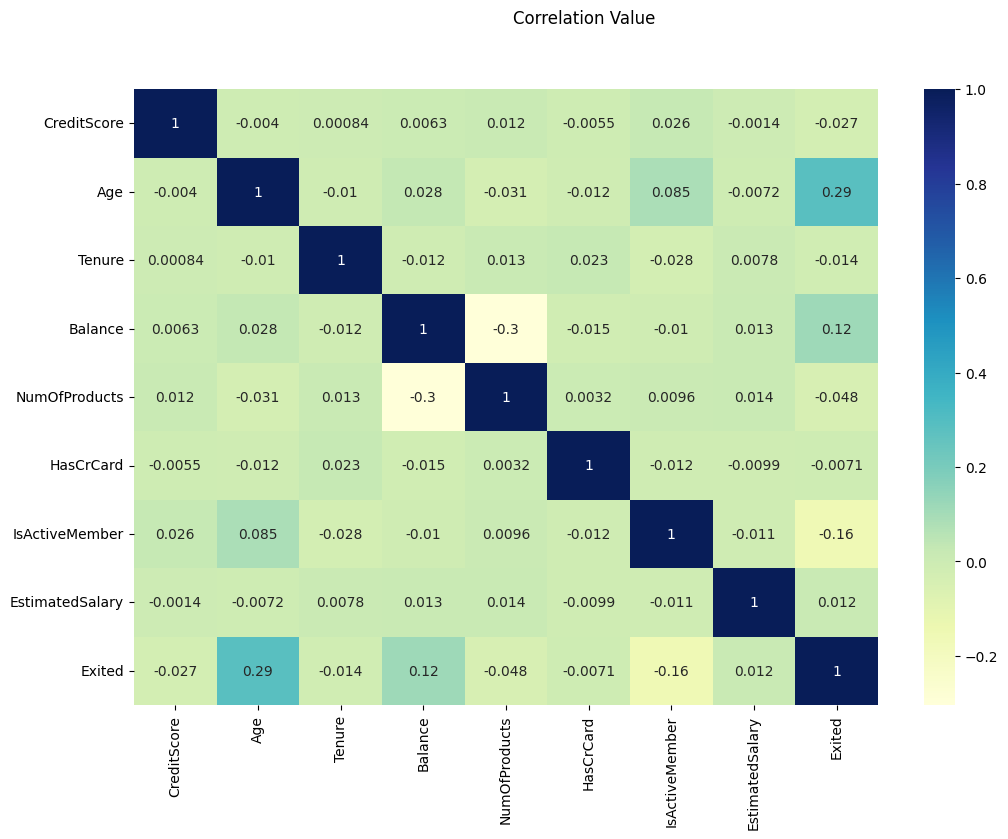

In [54]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
plt.suptitle('Correlation Value')
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

### Multi Colinearity

C:\Users\prase\AppData\Local\Temp\ipykernel_24404\3996686359.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.loc[:,'CreditScore':'EstimatedSalary'].corr(),cmap='YlGnBu',annot=True)


<AxesSubplot: >

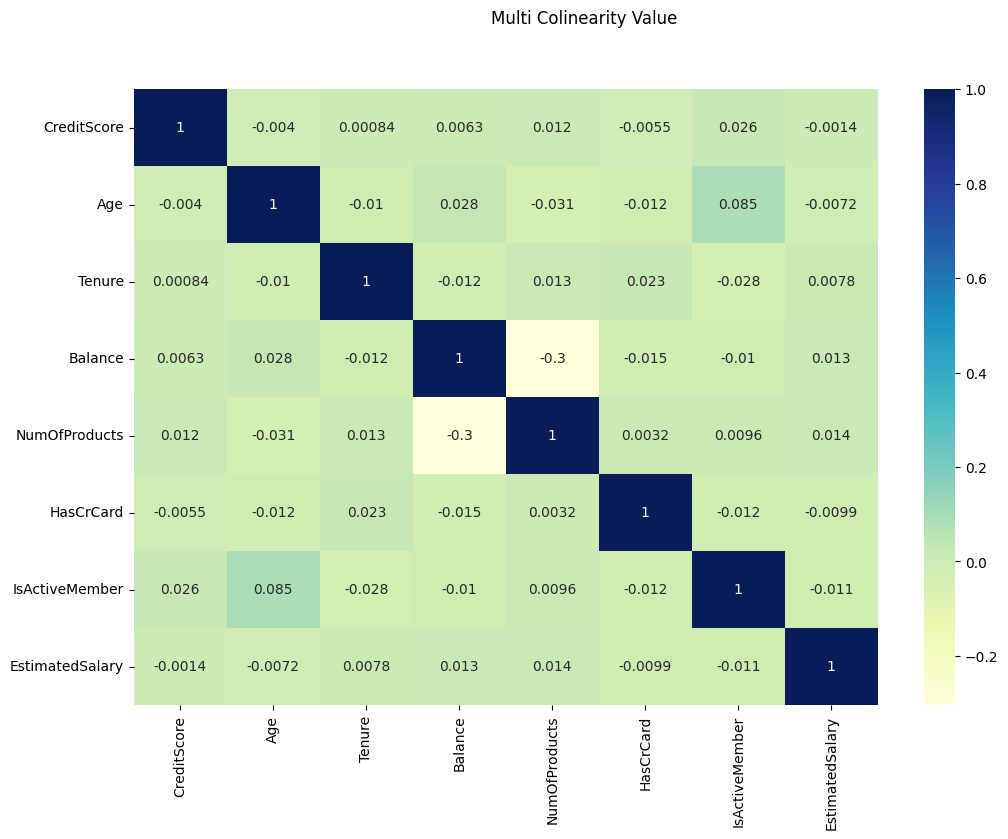

In [55]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
plt.suptitle('Multi Colinearity Value')
sns.heatmap(df.loc[:,'CreditScore':'EstimatedSalary'].corr(),cmap='YlGnBu',annot=True)

## Feature Engineering

In [56]:
df_fe=df.copy()

In [57]:
df_fe['CreditScoreGivenAge']=df_fe['CreditScore']/df_fe['Age']
df_fe['TenureByAge']=df_fe['Tenure']/df_fe['Age']
df_fe['BalanceSalaryRatio']=df_fe['Balance']/df_fe['EstimatedSalary']

In [58]:
df_fe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGivenAge,TenureByAge,BalanceSalaryRatio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,14.738095,0.047619,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14.829268,0.024390,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,11.952381,0.190476,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,17.923077,0.025641,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,19.767442,0.046512,1.587055


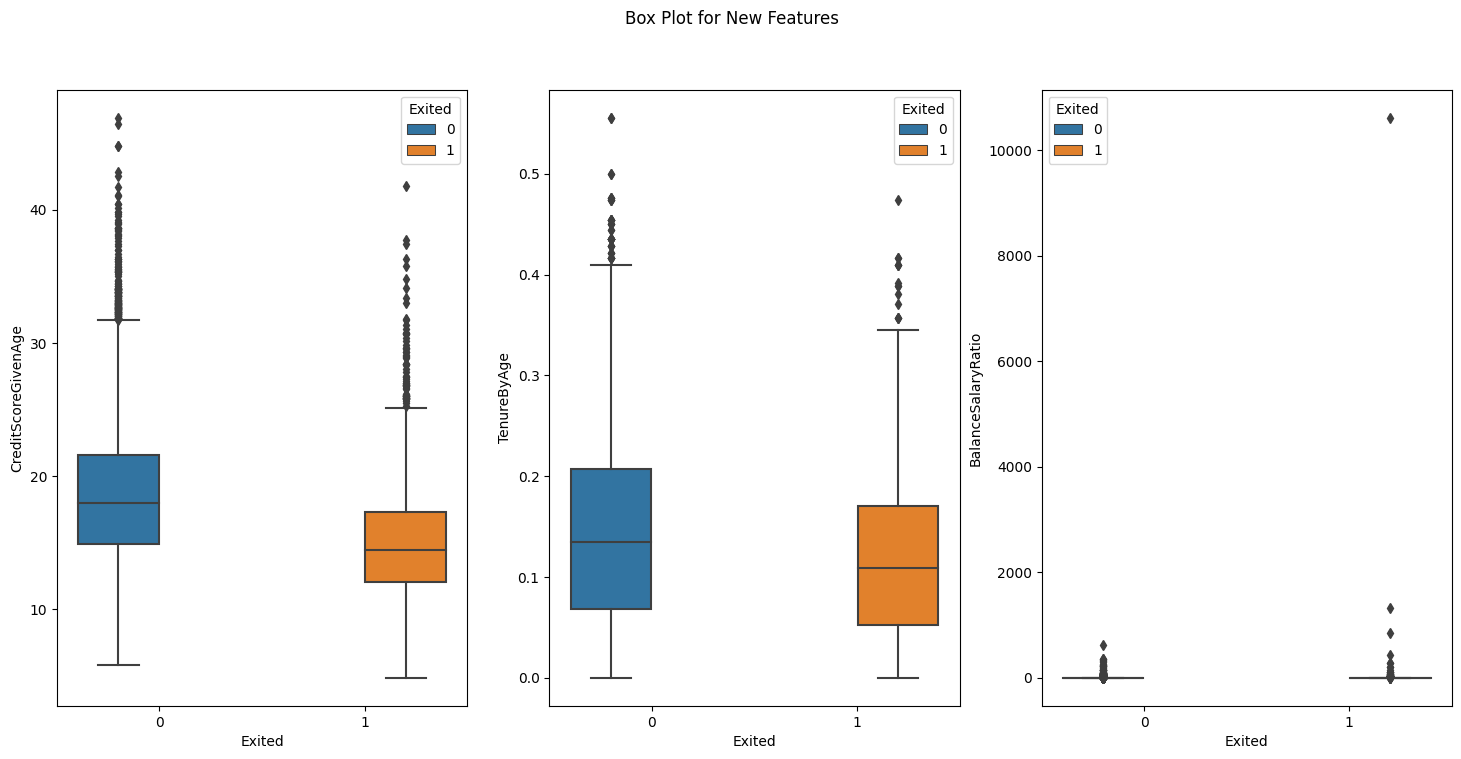

In [59]:
y_fe_name=['CreditScoreGivenAge','TenureByAge','BalanceSalaryRatio']
num_box_name=range(0,3)
fig,ax=plt.subplots(1,3,figsize=(18,8))
plt.suptitle('Box Plot for New Features')
for y_fe_box,num_box in zip(y_fe_name,num_box_name):
    sns.boxplot(y=y_fe_box,x='Exited',hue='Exited',data=df_fe,ax=ax[num_box])

## Data Preparation

### One Hot Encoding

In [60]:
df_prep=df_fe.copy()

In [61]:
encoded_features=['Geography','Gender']
encoded=pd.get_dummies(df_prep[encoded_features])
encoded


,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0
...,...,...,...,...,...
9995,1,0,0,0,1
9996,1,0,0,0,1
9997,1,0,0,1,0
9998,0,1,0,0,1


In [62]:
df_prep=pd.concat([df_prep,encoded],axis=1)

In [63]:
df_prep.drop(columns=['Geography','Gender','CreditScoreGivenAge','TenureByAge','BalanceSalaryRatio'],inplace=True)

In [64]:
df_prep.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [65]:
df_prep.assign(Exited=df_prep['Exited'])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


## Train Test Split

In [66]:
x=(df_prep.drop(columns='Exited'))
y=pd.DataFrame(df_prep['Exited'])

In [67]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## Feature Scalling

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Modelling and Evaluation

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

### Score Definition
1. Accuracy= seberapa akurat prediksi model
2. Precision= seberapa baik prediksi label positif dari model
3. Recall= seberapa baik kualitas model dalam memprediksi data yang positif
4. F1-Score= harmonic mean(representatif) dari precision recall
5. ROC-AUC= seberapa yakin model dalam prediksinya

### Fit Model

### Logistic Regression

In [72]:
log=LogisticRegression()
log.fit(x_train,y_train.values.ravel())

LogisticRegression()

In [73]:
print('Logistic Regression')
lr_pred=log.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,lr_pred))
print('Precision Score:',precision_score(y_test,lr_pred))
print('Recall Score:',recall_score(y_test,lr_pred))
print('F1 Score:',f1_score(y_test,lr_pred))

lr_pred_proba=log.predict_proba(x_test)[::,-1]
print('ROC-AUC:',roc_auc_score(y_test,lr_pred_proba))


Logistic Regression
Accuracy Score: 0.8125
Precision Score: 0.6388888888888888
Recall Score: 0.2216867469879518
F1 Score: 0.3291592128801431
ROC-AUC: 0.777542472730037


### Support Vector Classifier

In [74]:
svc=SVC(probability=True)
svc.fit(x_train,y_train.values.ravel())

SVC(probability=True)

In [75]:
print('SVC')
svc_pred=svc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,svc_pred))
print('Precision Score:',precision_score(y_test,svc_pred))
print('Recall Score:',recall_score(y_test,svc_pred))
print('F1 Score:',f1_score(y_test,svc_pred))

svc_pred_proba=svc.predict_proba(x_test)[::,-1]
print('ROC-AUC:',roc_auc_score(y_test,svc_pred_proba))


SVC
Accuracy Score: 0.8615
Precision Score: 0.8670212765957447
Recall Score: 0.3927710843373494
F1 Score: 0.5406301824212272
ROC-AUC: 0.842409638554217


### Random Forest Classifier

In [76]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

In [77]:
print('Random Forest Classifier')
rfc_pred=rfc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,rfc_pred))
print('Precision Score:',precision_score(y_test,rfc_pred))
print('Recall Score:',recall_score(y_test,rfc_pred))
print('F1 Score:',f1_score(y_test,rfc_pred))

rfc_pred_proba=rfc.predict_proba(x_test)[::,-1]
print('ROC-AUC:',roc_auc_score(y_test,rfc_pred_proba))


Random Forest Classifier
Accuracy Score: 0.8625
Precision Score: 0.7991452991452992
Recall Score: 0.4506024096385542
F1 Score: 0.576271186440678
ROC-AUC: 0.8640758618068489


## Resampling

In [78]:
y_train.value_counts()

Exited
0         6378
1         1622
dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)
print(y_smote.value_counts())

Exited
0         6378
1         6378
dtype: int64


## Test Resampling

### Logistic Regression Resampled

In [80]:
log1=LogisticRegression()
log1.fit(x_smote,y_smote.values.ravel())

LogisticRegression()

In [81]:
log1_pred=log1.predict(x_test)
print('Logistic Regression Resampled')
print('Accuracy Score',accuracy_score(y_test,log1_pred))
print('Precision Score',precision_score(y_test,log1_pred))
print('Recall Score',recall_score(y_test,log1_pred))
print('F1 Score',f1_score(y_test,log1_pred))

log1_pred=rfc.predict_proba(x_test)[::,-1]
print('ROC-AUC',roc_auc_score(y_test,rfc_pred_proba))


Logistic Regression Resampled
Accuracy Score 0.727
Precision Score 0.406827880512091
Recall Score 0.689156626506024
F1 Score 0.5116279069767442
ROC-AUC 0.8640758618068489


### Support Vector Classifier Resampled

In [82]:
svc1=SVC(probability=True)
svc1.fit(x_smote,y_smote.values.ravel())

SVC(probability=True)

In [83]:
svc1_pred=svc1.predict(x_test)
print('Support Vector Classifier Resampled')
print('Accuracy Score',accuracy_score(y_test,svc1_pred))
print('Precision Score',precision_score(y_test,svc1_pred))
print('Recall Score',recall_score(y_test,svc1_pred))
print('F1 Score',f1_score(y_test,svc1_pred))

svc1_pred=rfc.predict_proba(x_test)[::,-1]
print('ROC-AUC',roc_auc_score(y_test,rfc_pred_proba))


Support Vector Classifier Resampled
Accuracy Score 0.8015
Precision Score 0.515358361774744
Recall Score 0.727710843373494
F1 Score 0.6033966033966034
ROC-AUC 0.8640758618068489


### Random Forest Classifier Resampled

In [84]:
rfc1=RandomForestClassifier()
rfc1.fit(x_smote,y_smote.values.ravel())

RandomForestClassifier()

In [85]:
rfc1_pred=rfc1.predict(x_test)
print('Random Forest Classifier Resampled')
print('Accuracy Score',accuracy_score(y_test,rfc1_pred))
print('Precision Score',precision_score(y_test,rfc1_pred))
print('Recall Score',recall_score(y_test,rfc1_pred))
print('F1 Score',f1_score(y_test,rfc1_pred))

rfc1_pred=rfc.predict_proba(x_test)[::,-1]
print('ROC-AUC',roc_auc_score(y_test,rfc_pred_proba))


Random Forest Classifier Resampled
Accuracy Score 0.8475
Precision Score 0.6502732240437158
Recall Score 0.5734939759036145
F1 Score 0.6094750320102433
ROC-AUC 0.8640758618068489


**Berdasarkan tes resampling, dapat dilihat bahwa hasil modelling menggunakan tes resampling tidak membuat score meningkat. Sehingga model yang digunakan adalah model dengan algoritma Support Vector Classifier**

In [86]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [87]:
x.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

## Model Deployment

In [88]:
import pickle
pickle_out=open('model.pkl',mode='wb')
pickle.dump(svc,pickle_out)
pickle_out.close

<function BufferedWriter.close>

* Sudah dilakukan deployment melalui Streamlit, namun masih tidak yakin benar. Model Deployment akan dikoreksi lagi kedepannya

# **END OF THE CODE**